In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = {
    'User_ID': range(1, 10001),
    'Social_Media_Usage': np.random.normal(50, 15, 10000),  # Average minutes per day
    'Video_Usage': np.random.normal(100, 20, 10000),        # Average minutes per day
    'Messaging_Usage': np.random.normal(30, 10, 10000),     # Average minutes per day
    'Data_Consumption': np.random.normal(2, 0.5, 10000),    # GB per month
    'Age': np.random.randint(18, 60, 10000),
    'Region': np.random.choice(['North', 'South', 'East', 'West'], 10000)
}

In [6]:

# Convert to DataFrame
df = pd.DataFrame(data)

# Preprocess data
df_numeric = df[['Social_Media_Usage', 'Video_Usage', 'Messaging_Usage', 'Data_Consumption', 'Age']]
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

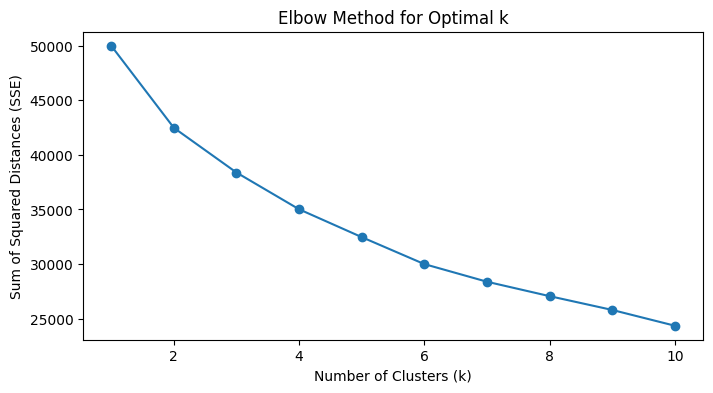

Cluster Descriptions:
   Social_Media_Usage  Video_Usage  Messaging_Usage  Data_Consumption  \
0           45.942098    86.503299        24.970963          1.915560   
1           49.439622   117.899198        35.631562          1.931210   
2           52.657473   110.995513        20.902030          2.143633   
3           60.796291    90.291856        36.096537          2.395797   
4           42.568926    94.866688        33.728323          1.646376   

         Age  
0  49.364477  
1  47.742604  
2  29.722368  
3  35.219178  
4  27.849725  


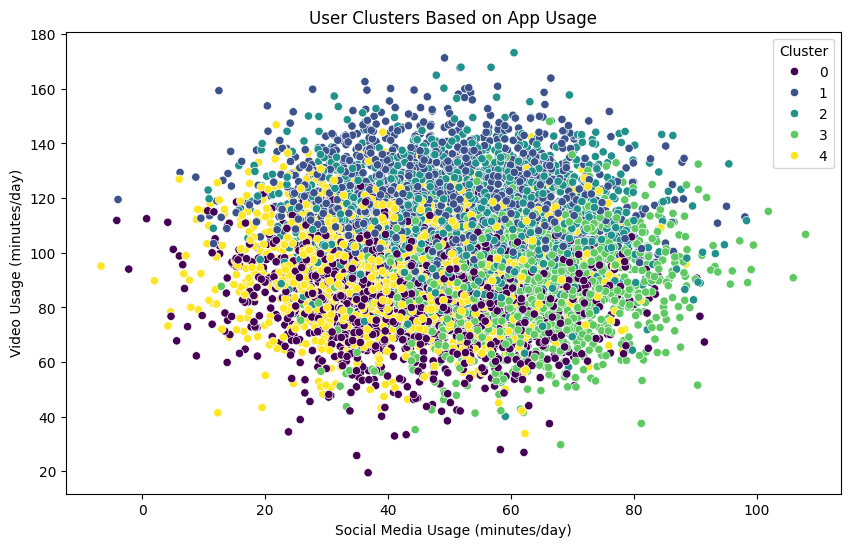

In [7]:
plt.figure(figsize=(8, 4))
plt.plot(k_values, sse, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Sum of Squared Distances (SSE)")
plt.show()

k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Cluster sss
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_descriptions = pd.DataFrame(cluster_centers, columns=df_numeric.columns)
print("Cluster Descriptions:")
print(cluster_descriptions)

# Visualize clusters 
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Social_Media_Usage'], y=df['Video_Usage'], hue=df['Cluster'], palette="viridis")
plt.title("User Clusters Based on App Usage")
plt.xlabel("Social Media Usage (minutes/day)")
plt.ylabel("Video Usage (minutes/day)")
plt.legend(title="Cluster")
plt.show()

df.to_csv('user_clusters.csv', index=False)
